In [1]:
#packages needed
import pandas as pd
import matplotlib.pyplot as plt
import re

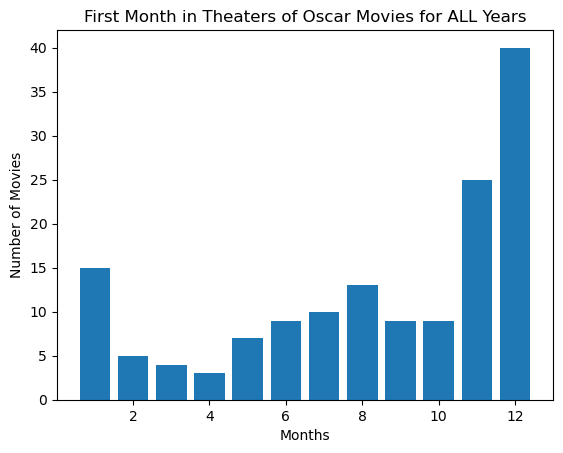

In [12]:
#importing csv file from ReleaseMonthScraper
df = pd.read_csv("movie_months.csv")
#pulling the month from the first full date for each movie
df["first_full_date_in_theaters"] = pd.to_datetime(df["first_full_date_in_theaters"])
df["Release Month"] = df["first_full_date_in_theaters"].dt.month

month_counts = df["Release Month"].value_counts().sort_index()
#creating the bar graph for all the movies
plt.bar(month_counts.index, month_counts.values)
plt.title("First Month in Theaters of Oscar Movies for ALL Years")
plt.xlabel("Months")
plt.ylabel("Number of Movies")          
plt.show()

In [6]:
#separating the eras to compare, with help from AI
df["first_full_date_in_theaters"] = pd.to_datetime(df["first_full_date_in_theaters"], errors="coerce")

# Extract year and month
df["year"] = df["first_full_date_in_theaters"].dt.year
df["month"] = df["first_full_date_in_theaters"].dt.month

# Define eras
df["era"] = df["year"].apply(lambda y: "Classic Era" if y < 2000 else "Modern Era")

# Create subsets
classic = df[df["era"] == "Classic Era"]
modern = df[df["era"] == "Modern Era"]


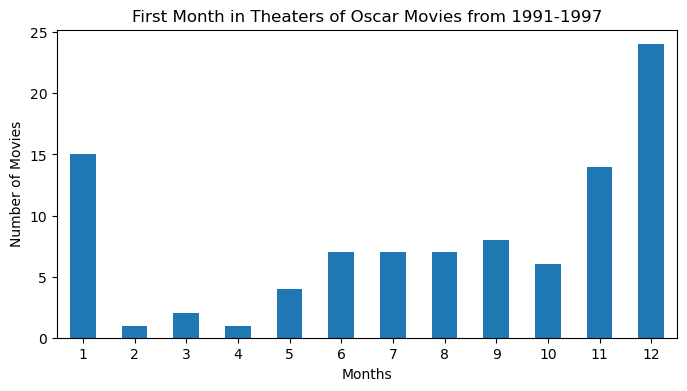

In [13]:
#Classic era movie months graph
plt.figure(figsize=(8,4))
classic["month"].value_counts().sort_index().plot(kind="bar")
plt.xticks(range(12), rotation=0)
plt.xlabel("Months")
plt.ylabel("Number of Movies")
plt.title("First Month in Theaters of Oscar Movies from 1991-1997")
plt.show()

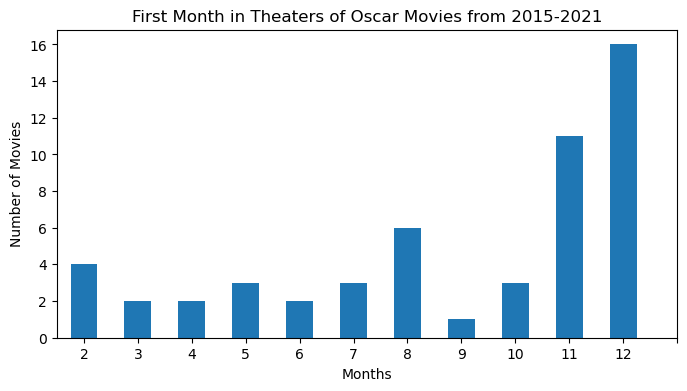

In [15]:
#new era movie months graph
plt.figure(figsize=(8,4))
modern["month"].value_counts().sort_index().plot(kind="bar")
plt.xticks(range(12), rotation=0)
plt.xlabel("Months")
plt.ylabel("Number of Movies")
plt.title("First Month in Theaters of Oscar Movies from 2015-2021")
plt.show()